# Training a neural network for image classification

A deep neural network is a network of artificial neurons organised into layers (via software). With each layer connected to the next and each connection having a weight that helps determine how much the artificial neuron fire. This firing helps determine how strong the connections are between layers, and in general neurons that fire together has stronger connections. Just like the biological version.
How strong these connections are is determined by how the network is trained on the data you put into it. These networks are trained via a process called backpropagation which works to feed data into the network and then measures the network’s performance. This error is measured using a loss function.
Backpropagation works by using gradient descent to measure the rate-of-change of the loss function with respect to the weighting of each connection, and the gradient descent step is used to make sure the error rate for each connection is reduced as close to zero as possible. The network should eventually converge on a solution where the overall error is minimised.
The rate at which the network learns is called the learning-rate and this is another hyperparameter that can be tuned when training neural networks. If the learning rate is too small, the network can take too long to converge on a solution, and conversely, if the learning rate is too large then the network will ‘bounce around’ and never really converge on an optimum solution.
There are different types of layers in neural networks, and each one transforms data differently. The most basic type is dense layers, which is where all neurons are connected. Other types include convoluted layers which are primarily used for image processing tasks and recurrent layers which are used to process time-series data. There are others, but these are the most common types.
In this article, I will be focusing on how to implement a simple image classifier using a series of dense layers using Keras as part of Tensorflow. As mentioned above, convoluted neural networks usually work better for image classification tasks and I will talk about these in part 2 of this series. As my primary area of interest is Search Engine Optimisation, I will tie all of this together in part 3 for how neural networks are used in search.
Neural networks are fascinating, and if you have an interest in this topic, I would encourage you to check out this excellent playlist on YouTube on a channel called Deep Lizard. They have excellent and accessible content on neural networks and deep learning.
If you are more interested in the implementation using Python with Keras, I would encourage you to look at Hands-on Machine Learning with Scikit-Learn, Keras and Tensorflow by Aurelion Geron. It is an excellent book, written by a former Google and reviewed by the author of Keras. I highly recommend it.

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
#make imports

# Importing the data set
For most simple image classification tasks, it is popular to use the MNIST data set, which consists of 60,000 photos of handwritten numbers. However, for this task, we are going to use the MNIST Fashion dataset, which consists of 60,000 28 x 28 grayscale images of Zalando article fashion images, all classified across 10 different classes. The reason for this is that image classifiers tend to find this more challenging.
Keras has utility functions to help import this dataset, so it is fairly straightforward to use (similar to sklearn). Work in a Jupyter notebook, and begin my makes sure we have all the imports we need:

In [34]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Normalizing the dataset

The first step to working with neural networks is to scale features before training a neural network, otherwise, it could take a lot longer for the network to converge on a solution.
The usual way of normalizing a dataset is to scale the features, and this is done by substracting the mean from each feature and dividing by the standard deviation. This will put the features on the same scale somwhere between 0 — 1.
As we are working with 28 x 28 NumPy arrays representing each image and each pixel in the array has an intensity somewhere between 1 — 255, a simpler way of getting all of these images on a scale between 0–1 is to divide each array by 255.

In [35]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255
#scale images

In [36]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]
#add class names 

In [37]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]), 
                                 keras.layers.Dense(300, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(100, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ),
                                 keras.layers.Dense(10, activation = "softmax" )]) 
#build deep NN layers

In [38]:
model.summary()
#summarise model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 286,810
Trainable params: 286,810
Non-trainable params: 0
________________________________________________

In [39]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"]) 

In [40]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7698 - accuracy: 0.7385 - val_loss: 0.5738 - val_accuracy: 0.7962
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4830 - accuracy: 0.8283 - val_loss: 0.4570 - val_accuracy: 0.8404
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4261 - accuracy: 0.8480 - val_loss: 0.4121 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3932 - accuracy: 0.8582 - val_loss: 0.3951 - val_accuracy: 0.8566
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3708 - accuracy: 0.8660 - val_loss: 0.3597 - val_accuracy: 0.8682
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3518 - accuracy: 0.8728 - val_loss: 0.3397 - val_accuracy: 0.8756
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3369 - accuracy: 0.8779 - val_loss: 0.3506 - val_accuracy:

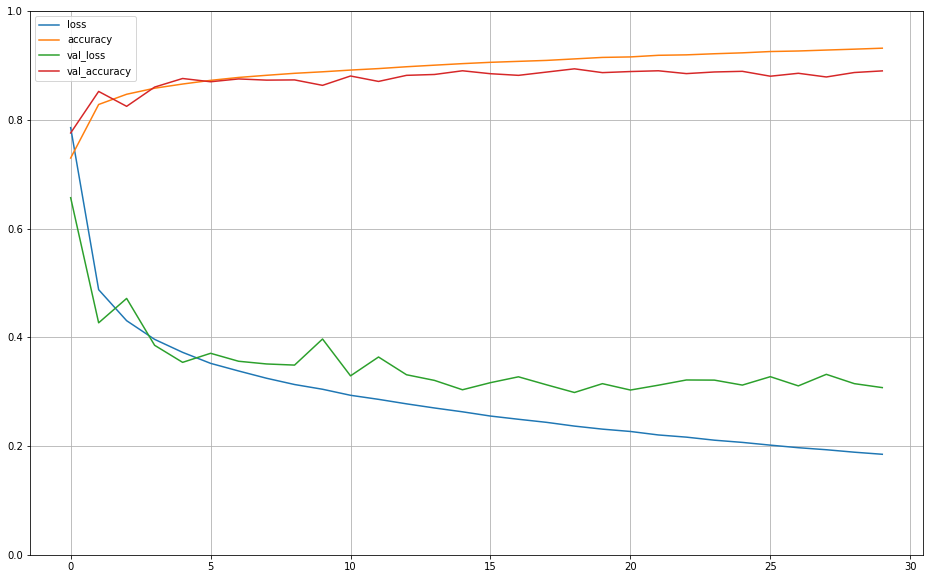

In [10]:
pd.DataFrame(history.history).plot(figsize = (16, 10)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 
#plot loss versus accuracy

In [11]:
model.evaluate(X_test,y_test)
#evalue model

313/313 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8874


[0.3248726427555084, 0.8873999714851379]

# Convolutional Neural Networks

In [ ]:
model = keras.models.Sequential([keras.layers.Conv2D(64, 7, activation = "relu", padding = "same", input_shape=[28,28,1]),
                                 keras.layers.MaxPooling2D(2),
                                 keras.layers.Conv2D(128, 3, activation = "relu"), padding = "same"),
                                  keras.layers.Conv2D(128, 3, activation = "relu"), padding = "same"),
                                  keras.layers.MaxPooling2D(2),
                                  keras.layers.Conv2D(256)
                                 ])

In [1]:
# TODO:  add RNN to solve MNIST Fashion

In [2]:
# TODO:  Format document into sections based on approach

In [3]:
# TODO:  Add images from MNIST Fashion data set to notebook 

In [4]:
# TODO:  Add commentary on what is happening with each network

In [5]:
# TODO:  Add conclusion and next steps

In [5]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [3]:
keras.__version__

'2.4.0'

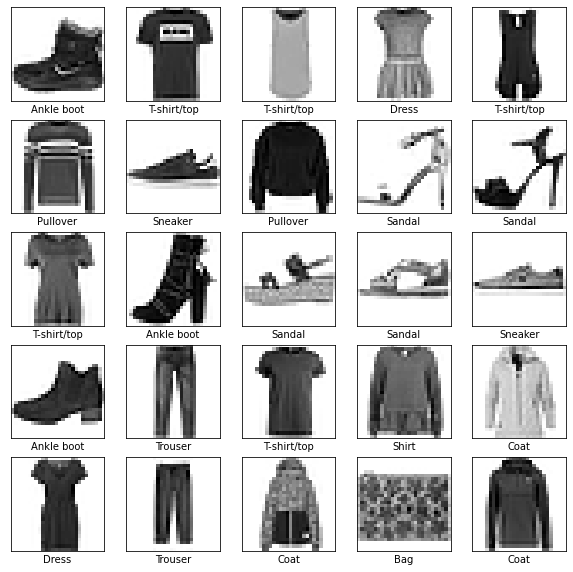

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [27]:
X_valid, X_train = X_train_full / 255., X_train_full / 255.